In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import pylab as py
import numpy as np
import sys
import os
import cv2
from keras.models import Model, load_model
from skimage.io import imread_collection
from skimage.transform import resize
from matplotlib import pyplot

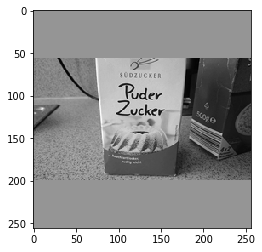

[[128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


In [16]:
datadir = "D:\images"
categories = ["SUGAR", "CAKE"]#, "Regular-Tomato", "Yellow-Onion"]
for c in categories:
    path = os.path.join(datadir, c) #path to the images
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), 0)   #reading every images in the two categories
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break    
        
print(img_arr) 

In [17]:
img_size = 64

training_data= []
def create_training_data():
    for c in categories:
        path = os.path.join(datadir, c)
        cat_num = categories.index(c)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_arr, (img_size, img_size))
                training_data.append([new_array, cat_num])
            except Exception as e:
                pass
            
                
       
        cat_num = categories.index(c)
        for img in os.listdir(path):
            try:
                new_array1 = cv2.flip(new_array, 0)
                training_data.append([new_array1, cat_num])
            except Exception as e:
                    pass 
 
   
        
        cat_num = categories.index(c)
        for img in os.listdir(path):
            try:
                img_arr1 = cv2.imread(os.path.join(path, img), 0)
                new_array2 = cv2.flip(new_array, 1)
                training_data.append([new_array2, cat_num])
            except Exception as e:
                pass 
            
            
create_training_data()
print(len(training_data))

837


In [18]:
import random
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])
print(len(training_data)) 

0
0
1
1
1
837


In [19]:
X = []
Y = []
for images, classes in training_data:
    X.append(images)
    Y.append(classes)
print(len(X))
X = np.array(X).reshape(-1, img_size, img_size, 1) 
print(len(X))

import pickle

pickle_out = open("Grox.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Groy.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close() 

837
837
